# Importing Necessary Libraries

In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Loading and Exploring Data

In [3]:
df=pd.read_csv("C:\\Users\\works\\Downloads\\python_dataset\\gender_classification_v7.csv")

In [4]:
df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [6]:
df.shape #checking the shape of the data

(5001, 8)

# checking for null and duplicate values

In [7]:
df.isna().sum() 

long_hair                    0
forehead_width_cm            0
forehead_height_cm           0
nose_wide                    0
nose_long                    0
lips_thin                    0
distance_nose_to_lip_long    0
gender                       0
dtype: int64

In [8]:
df.duplicated().sum()

1768

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.isna().sum()

long_hair                    0
forehead_width_cm            0
forehead_height_cm           0
nose_wide                    0
nose_long                    0
lips_thin                    0
distance_nose_to_lip_long    0
gender                       0
dtype: int64

In [86]:
df.info() #checking info of each column variable

<class 'pandas.core.frame.DataFrame'>
Index: 3233 entries, 0 to 4995
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  3233 non-null   int64  
 1   forehead_width_cm          3233 non-null   float64
 2   forehead_height_cm         3233 non-null   float64
 3   nose_wide                  3233 non-null   int64  
 4   nose_long                  3233 non-null   int64  
 5   lips_thin                  3233 non-null   int64  
 6   distance_nose_to_lip_long  3233 non-null   int64  
 7   gender                     3233 non-null   int32  
dtypes: float64(2), int32(1), int64(5)
memory usage: 343.7 KB


In [15]:
df.columns

Index(['long_hair', 'forehead_width_cm', 'forehead_height_cm', 'nose_wide',
       'nose_long', 'lips_thin', 'distance_nose_to_lip_long', 'gender'],
      dtype='object')

In [16]:
df.describe()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
count,3233.000000,3233.000000,3233.000000,3233.000000,3233.000000,3233.000000,3233.000000
mean,0.822456,13.217198,5.966038,0.536344,0.557686,0.538509,0.545314
std,0.382188,1.115993,0.549789,0.498755,0.496738,0.498592,0.498019
min,0.000000,11.400000,5.100000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,12.300000,5.500000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,13.200000,5.900000,1.000000,1.000000,1.000000,1.000000
75%,1.000000,14.100000,6.400000,1.000000,1.000000,1.000000,1.000000
max,1.000000,15.500000,7.100000,1.000000,1.000000,1.000000,1.000000


In [35]:
df.gender.value_counts()  #checking value counts of object column

gender
Male      1783
Female    1450
Name: count, dtype: int64

In [53]:
df.duplicated().sum()

0

In [54]:
df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [56]:
#importing libraries for data encoding
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

In [58]:
df.select_dtypes(include="object").head(5)

,gender
0,Male
1,Female
2,Male
3,Male
4,Female


In [61]:
#transformation of object datatype into integer
for i in df.select_dtypes(include="object"):
    df[i]=lb.fit_transform(df[i])

In [62]:
df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,1
1,0,14.0,5.4,0,0,1,0,0
2,0,11.8,6.3,1,1,1,1,1
3,0,14.4,6.1,0,1,1,1,1
4,1,13.5,5.9,0,0,0,0,0


In [87]:
data=df.copy() #copy of original data

In [64]:
data.head(3)

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,1
1,0,14.0,5.4,0,0,1,0,0
2,0,11.8,6.3,1,1,1,1,1


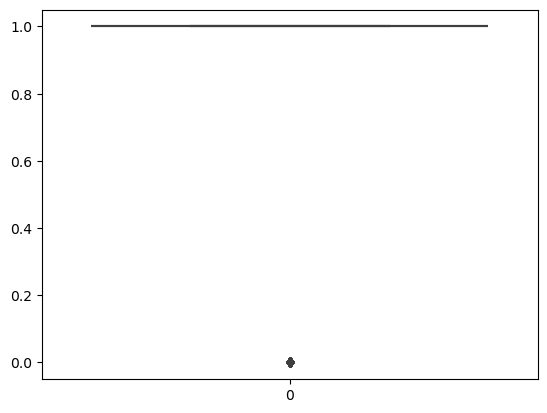

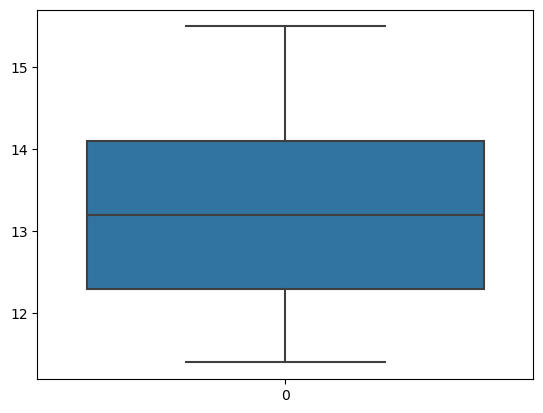

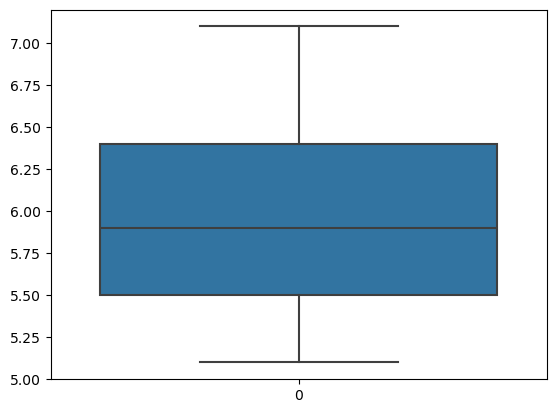

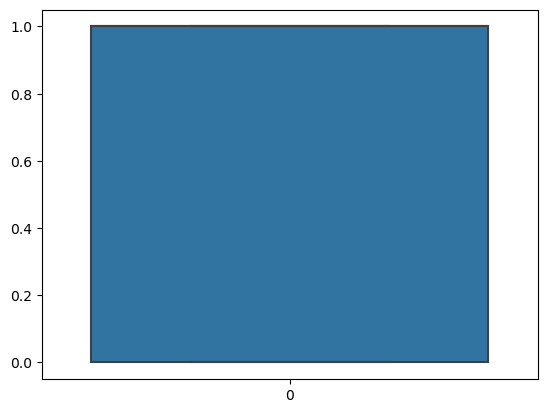

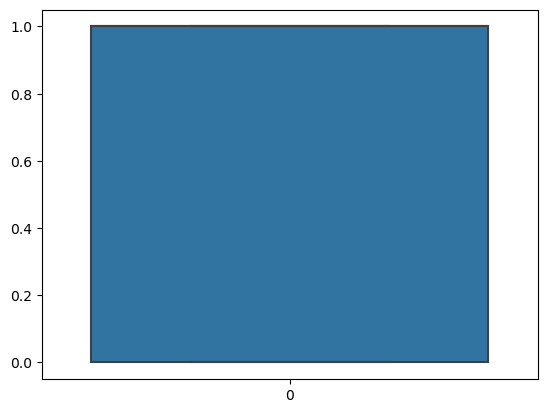

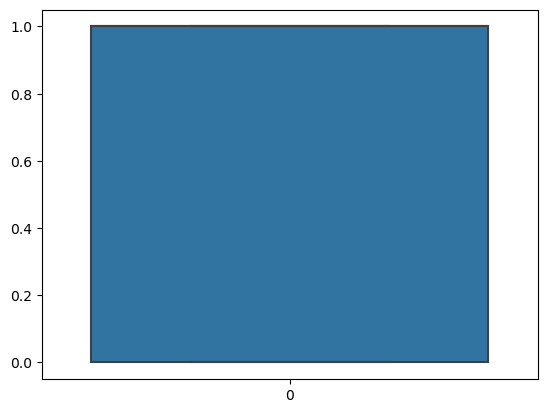

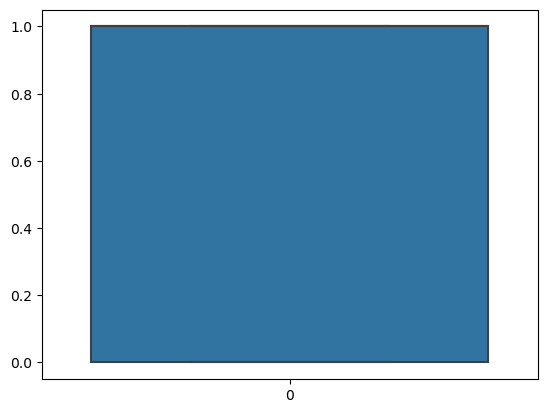

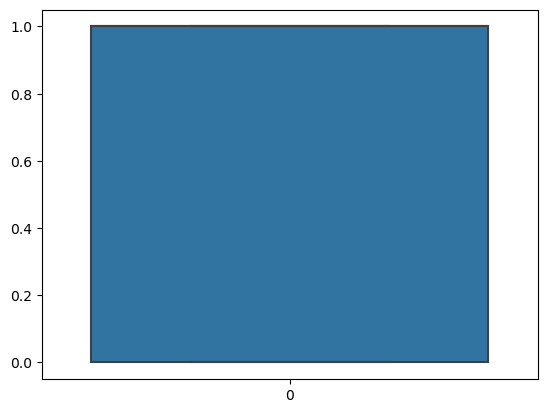

In [65]:
for i in df.columns:
    sns.boxplot(df[i])
    plt.show()

In [66]:
#outlier treatment
def outliertreat_IQR(d):
    m = d.quantile(0.5)
    q1 = d.quantile(0.25)
    q3 = d.quantile(0.75)
    q_1p = d.quantile(0.01)
    q_99p = d.quantile(0.99)
    iqr = q3 - q1
    lc = q1 - 1.5*iqr
    uc = q3 + 1.5*iqr
    return lc,uc

In [69]:
data.apply(outliertreat_IQR)

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1.0,9.6,4.15,-1.5,-1.5,-1.5,-1.5,-1.5
1,1.0,16.8,7.75,2.5,2.5,2.5,2.5,2.5


In [83]:
data.drop(["long_hair"],axis=1,inplace=True)

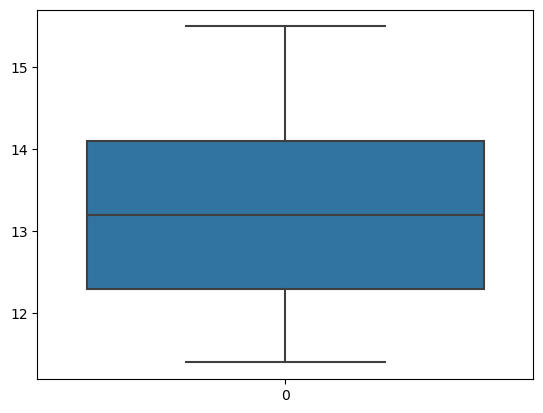

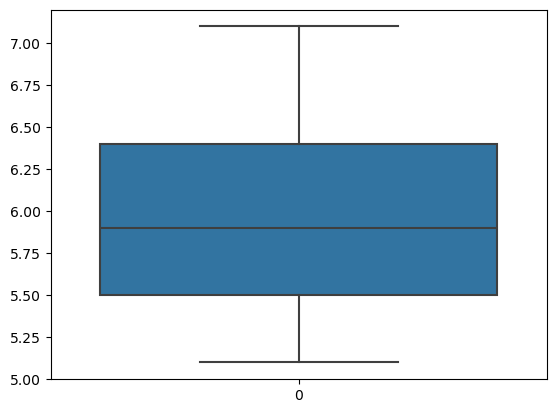

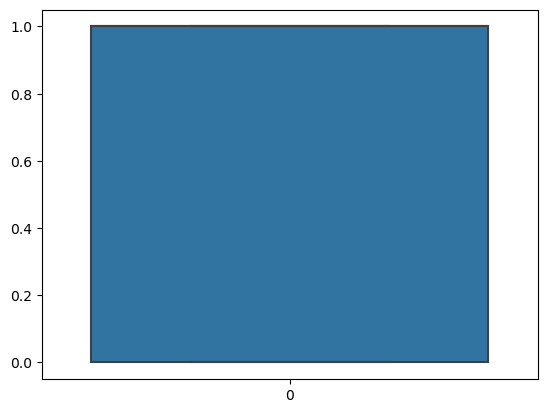

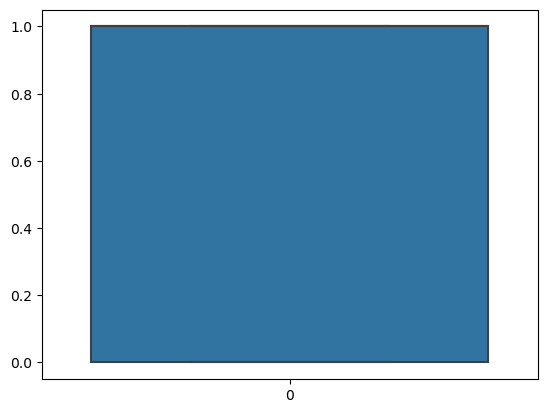

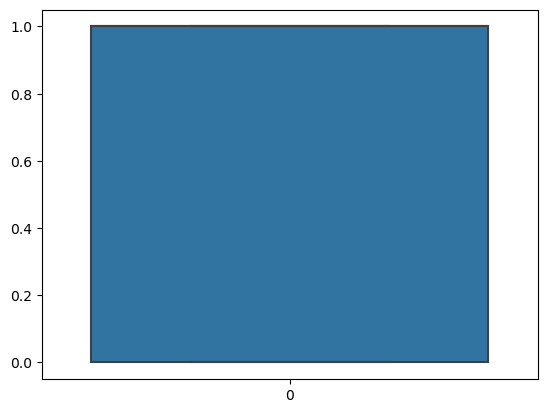

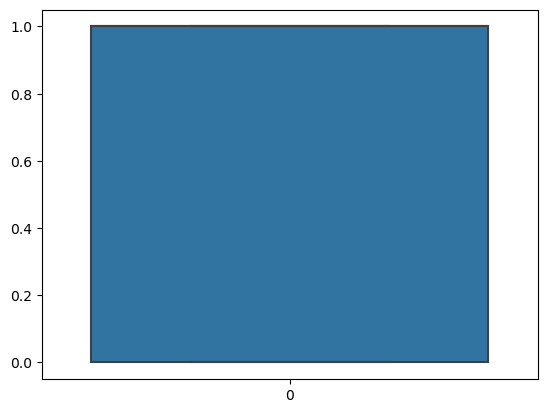

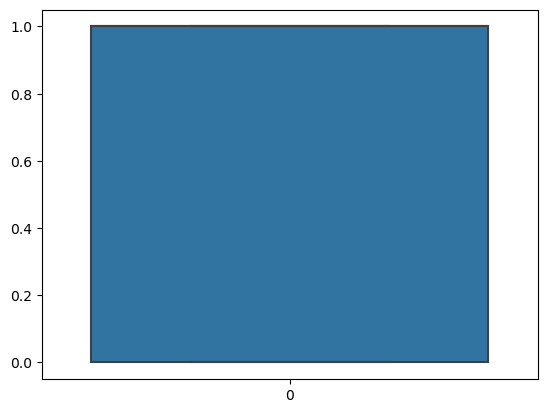

In [84]:
for col in data:
    sns.boxplot(data[col])
    plt.show()

In [88]:
x=data.drop("gender",axis=1)
y=data.gender

In [89]:
from sklearn.model_selection import train_test_split

In [73]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=51)

In [74]:
from sklearn.linear_model import LogisticRegression

In [76]:
lr=LogisticRegression()

In [77]:
lr.fit(x_train,y_train)

LogisticRegression()

In [78]:
pred=lr.predict(x_test)

In [79]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [80]:
print(accuracy_score(y_test,pred))

0.9582689335394127


In [81]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       279
           1       0.97      0.96      0.96       368

    accuracy                           0.96       647
   macro avg       0.96      0.96      0.96       647
weighted avg       0.96      0.96      0.96       647



In [82]:
print(confusion_matrix(y_test,pred))

[[268  11]
 [ 16 352]]
